<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import os
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Load the csv file

In [47]:
df1=pd.read_csv('bank.csv')
df1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


In [3]:
df1.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
age               9640 non-null int64
duration          9640 non-null int64
campaign          9640 non-null int64
pdays             9640 non-null int64
previous          9640 non-null int64
emp.var.rate      9640 non-null float64
cons.price.idx    9640 non-null float64
cons.conf.idx     9640 non-null float64
euribor3m         9640 non-null float64
nr.employed       9640 non-null float64
y                 9640 non-null object
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB


In [5]:
df1.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
df1.head()
a=['age','duration','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

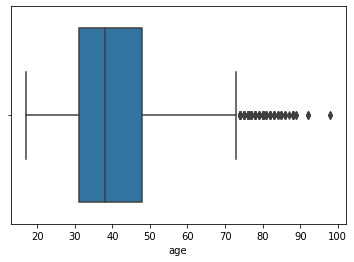

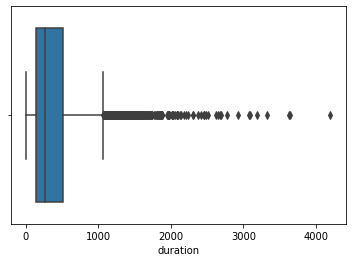

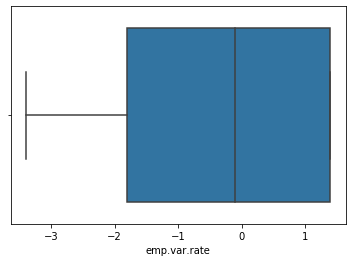

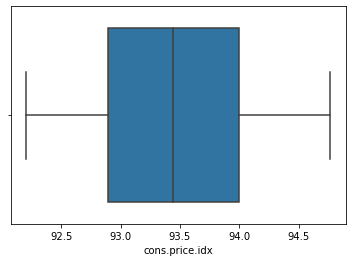

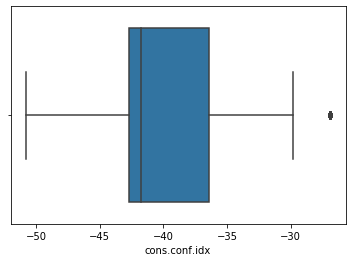

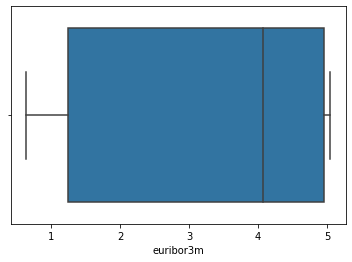

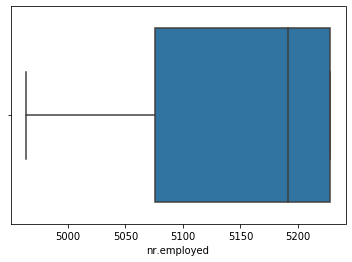

In [49]:
for i in a:
    sns.boxplot(df1[i])
    plt.show()

In [50]:
x=['age','duration','cons.conf.idx']

for i in x:
    q1=np.percentile(df1[i],25)
    q3=np.percentile(df1[i],75)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    df1=df1.drop(df1[df1[i]>ul].index)
    df1=df1.drop(df1[df1[i]<ll].index)

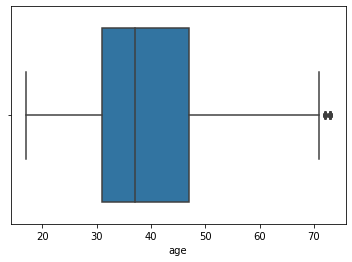

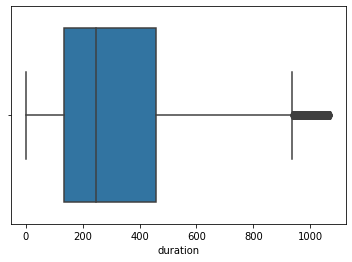

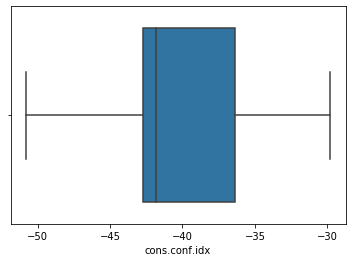

In [51]:
for i in x:
    sns.boxplot(df1[i])
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
df1['y']=df1['y'].replace({'yes':1,'no':0})

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
df1.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

There are no null values present in the dataset.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Skewness: 0.618040713789507


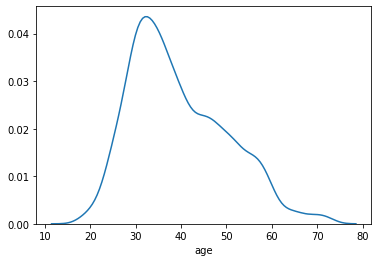

Skewness: 1.0687528999532085


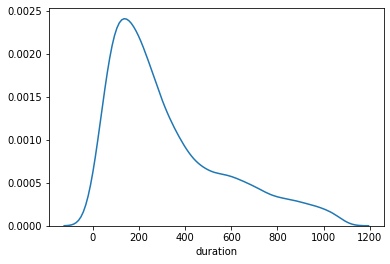

Skewness: -0.19675051296841722


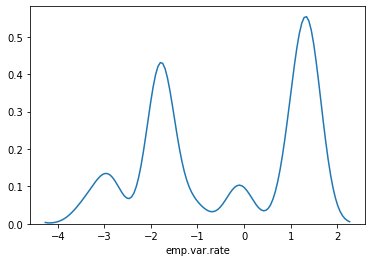

Skewness: -0.1276310485152605


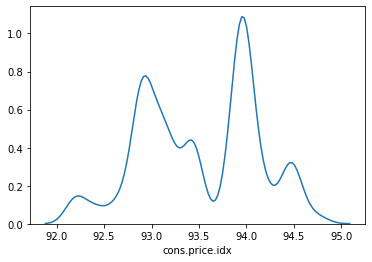

Skewness: 0.18201220042962826


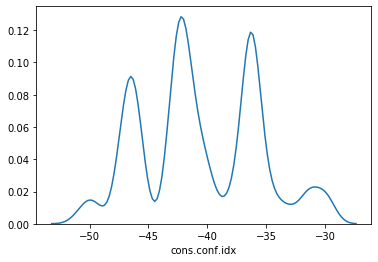

Skewness: -0.10535229859590575


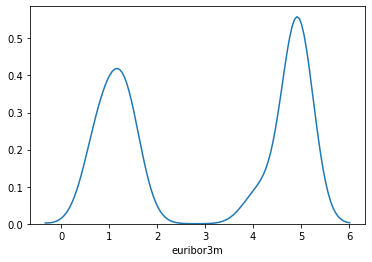

Skewness: -0.528301765678603


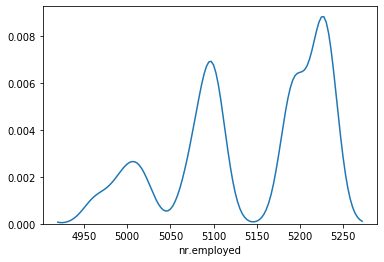

In [38]:
for i in a:
    sns.distplot(df1[i],hist=False)
    print('Skewness:',df1[i].skew())
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

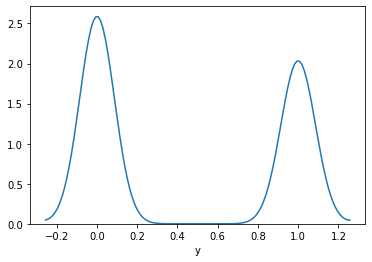

In [41]:
sns.distplot(df1['y'],hist=False)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [73]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
df1[['age',
 'duration',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']]=se.fit_transform(df1[['age',
 'duration',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']])

In [75]:
df1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-0.703620,-0.475858,2,999,0,0.890198,0.787793,0.843047,0.960341,0.594770,0
1,-0.703620,1.483804,10,999,0,1.069026,0.664758,-0.423457,1.014807,1.031947,1
2,0.516257,-1.121014,8,999,0,1.069026,-0.102593,0.903357,1.016409,1.031947,0
3,-0.609783,0.310426,1,5,2,-0.421202,1.770455,-1.790479,-1.082671,-2.084852,1
4,0.703930,2.338636,2,999,1,-0.838466,-0.699962,-1.308001,-0.878156,-0.488155,1


<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import roc_curve

In [79]:
x=df1.drop('y',axis=1)
y=df1['y']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)
y_train_prob = knn.predict_proba(x_train)[:,1:]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Define a function to plot the confusion matrix.

Confusion Matrix:

 [[3081  372]
 [ 244 2448]]


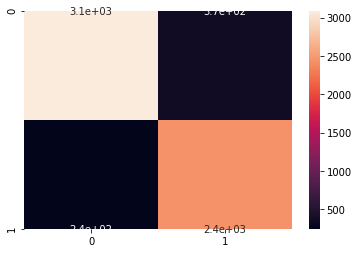

In [99]:
def conf_mat(a,b):
    print('Confusion Matrix:\n\n',cm(a,b))
    sns.heatmap(cm(a,b),annot=True)
    
conf_mat(y_train,y_train_pred)

#### Define a function to plot the ROC curve.

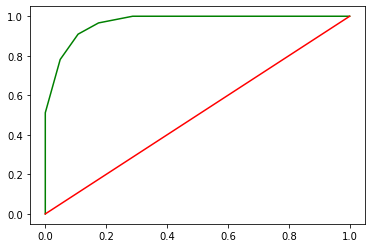

In [131]:
def roc_curves(a,b):
    fpr,tpr,threshold = roc_curve(a,b)
    plt.plot(fpr,tpr,color='g')
    plt.plot(fpr,fpr,color='r')
    plt.show()
    
roc_curves(y_train,y_train_prob)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [150]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

#params = {'n_neighbors':[3],'metric':'euclidean'}

#rsearch = RandomizedSearchCV(knn,param_distributions=params,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=3,return_train_score=True)
#rsearch.fit(x_train,y_train)

#knn = KNeighborsClassifier(**rsearch.best_params_)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)

print('Accuracy of model:\t',accuracy_score(y_train,y_train_pred))

Accuracy of model:	 0.9096826688364524


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Confusion Matrix:

 [[3126  327]
 [ 228 2464]]


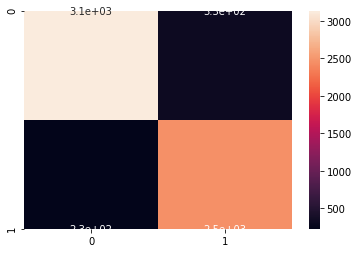

In [151]:
conf_mat(y_train,y_train_pred)

In [158]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3453
           1       0.84      0.88      0.86      2692

    accuracy                           0.87      6145
   macro avg       0.87      0.88      0.87      6145
weighted avg       0.88      0.87      0.87      6145



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [160]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

params = {'n_neighbors':np.arange(1,25,2),'metric':['hamming','euclidean','manhattan','Chebyshev']}

rsearch = RandomizedSearchCV(knn,param_distributions=params,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=3,return_train_score=True)
rsearch.fit(x_train,y_train)

knn = KNeighborsClassifier(**rsearch.best_params_)
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=21)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [164]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=21)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3453
           1       0.84      0.88      0.86      2692

    accuracy                           0.87      6145
   macro avg       0.87      0.88      0.87      6145
weighted avg       0.88      0.87      0.87      6145



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [166]:
from sklearn.metrics import roc_auc_score

In [168]:
y_train_prob = knn.predict_proba(x_train)[:,1]
print('ROC_AUC_Score:',roc_auc_score(y_train,y_train_prob)

0.948316471367362

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

In [ ]:
# type your code here

<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here